In [114]:
import quickspikes as qs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook


#this is a helper functionm to set all fontsizes and details for publication grade figure
def pubFigStyle():
    #This makes sure the text is editable and not an outline in the svg export
    plt.rcParams['svg.fonttype'] = 'none'
    
    #pretty figure style
    sns.set_style('ticks')
    
    #font sizes of axes, labels etc
    sns.set_context("paper", rc={"font.size":5,"axes.titlesize":3,"axes.labelsize":7,'lines.linewidth' : 1,
                                 'lines.markersize' :1,'xtick.labelsize' : 6,'ytick.labelsize' : 6,
                                 })   
    

#call the helper function
pubFigStyle()
    
#this is the spike detector
def detect(samples,thresh=1.5,win=5):
    #Based on the threshold and window, it returns the times of spikes
    
    reldet = qs.detector(thresh,win)
    
    #relative detextor for moving signals/offsets with non zero means
    reldet.scale_thresh(samples.mean(), samples.std())
    
    #detect spikes
    times = reldet.send(samples)
    return times



In [74]:
##filepath of the data
filepath='/home/rhagoletis/Downloads/applefly_practice_raster.txt'

In [119]:
#read dataframe, it is tab sepearted instead of comma
df=pd.read_csv(filepath,sep='\t')

#replace the index with time column and drop the time column
df.index=df.Time
df=df.drop('Time',axis=1)


# df

<IPython.core.display.Javascript object>


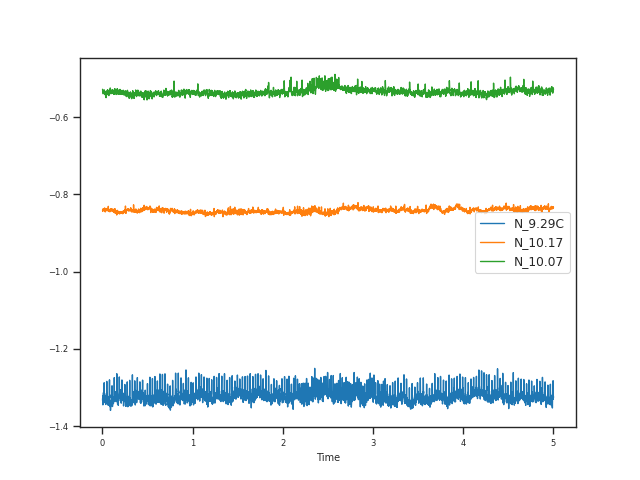

In [120]:
df.plot()

<IPython.core.display.Javascript object>


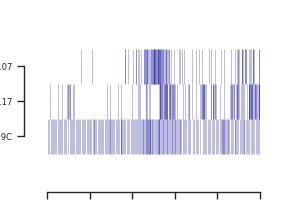

In [138]:
#create an empty to list ot collect all times
times=[]

#iterate through all the data columns in df
for col in df:
    
    #append the time index of spikes of each column
    times.append(df.index[detect(df[col].values)])

    
#create an empty figure of size (in inches)
plt.figure(figsize=(3,2))

#the magical raster plot. the linewidths can be set, and many other parameters
#the colors is the hex code to make it possible to set any color
#the alpha sets the transparency
events=plt.eventplot(times,linewidths=.6,colors='#000090',alpha=0.3)


#get the current axes, and set the labels
ax=plt.gca()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Neuron')


#rename the rows to to 1, 2, 3...
ax.set_yticks(range(len(events)))

#rename rows to name of neuron from df columns instead
ax.set_yticklabels(df.columns)

#remove the outline box to make it pretty
sns.despine(trim=True, offset=10)

In [132]:
#save the figure as svg and png, make it transparent without any inside boxes to make it easy for editing in illustratror

plt.savefig('raster.png',transparent=True,papertype='A4',frameon=False,dpi=300,)
plt.savefig('raster.svg',transparent=True,papertype='A4',frameon=False,)